In [175]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [176]:
# Spotify API istemci kimliği ve gizli anahtarını girin
client_id = '2c968caee24446c8af83bd3889b36e22'
client_secret = '270d7a402ace40d8b6585bd4a593bab3'

# Çalma listesi id'sini girin
playlist_id = '3HIzKofNz0UEkPrj0OdHX3'


In [177]:
# Spotify API'ye yetkilendirme sağlayın
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [178]:
# Çalma listesindeki tüm şarkıları almak için bir döngü kullanın
# Çalma listesindeki tüm şarkıların özelliklerini depolamak için bir liste oluştur
playlist_features = []
offset = 0
limit = 100


while True:
    # Şarkıları çek
    results = sp.playlist_tracks(playlist_id, limit=limit, offset=offset)
    tracks = results['items']
    
    # Her bir şarkı için verileri çek ve listeye ekle
    for track in tracks:
        # Şarkı ID'sini al
        song_id = track['track']['id']
        name = track['track']['name']

        # Şarkının ses özelliklerini al
        audio_features = sp.audio_features([song_id])[0]

        # Şarkının diğer özelliklerini al
        track_info = sp.track(song_id)
        popularity = track_info['popularity']
        artist_id = track_info['artists'][0]['id']
        artist_info = sp.artist(artist_id)
        genres = artist_info['genres']


        # Özellikleri bir sözlük olarak depolayın
        data = {
            'name': name,
            'song_id': song_id,
            'danceability': audio_features['danceability'],
            'energy': audio_features['energy'],
            'loudness': audio_features['loudness'],
            'speechiness': audio_features['speechiness'],
            'acousticness': audio_features['acousticness'],
            'instrumentalness': audio_features['instrumentalness'],
            'liveness': audio_features['liveness'],
            'valence': audio_features['valence'],
            'tempo': audio_features['tempo'],
            'popularity': popularity
        }

        # Şarkı verilerini listeye ekle
        playlist_features.append(data)
    
    # Sonraki sayfaya geçmek için offset değerini güncelle
    offset += limit
    print(offset)
    
    # Tüm şarkılar çekildiyse döngüyü sonlandır
    if len(tracks) < limit:
        break



100
200
300
400
500
600
700
800


In [181]:
music=pd.DataFrame(playlist_features)


,name,song_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,Makeba,5JdLUE9D743ob2RtgmVpVx,0.824,0.656,-9.432,0.0704,0.388000,0.506000,0.2530,0.418,116.068,82
1,1944,2nxTpjhxLXeyBOxYnRnT76,0.809,0.506,-5.235,0.0565,0.596000,0.007280,0.2400,0.470,120.012,52
2,On The Run,4sLozZ8Weo81XhRrwqbqnJ,0.627,0.482,-13.403,0.0374,0.000601,0.000948,0.0703,0.157,125.027,39
3,Somebody That I Used To Know,1qDrWA6lyx8cLECdZE7TV7,0.865,0.521,-6.932,0.0371,0.548000,0.000115,0.0989,0.748,129.059,82
4,Cadence - VIP,3Il52a6rYUkigKzA8Y0GPU,0.512,0.793,-2.668,0.0570,0.000264,0.598000,0.3080,0.038,174.095,55
...,...,...,...,...,...,...,...,...,...,...,...,...
784,Desmal,0wLimsuIlahPUkjAuAfHsI,0.261,0.294,-16.559,0.0648,0.869000,0.225000,0.9020,0.542,144.454,30
785,The Path of Silence,01GzR8CaxfoPzAWYhvH8Nn,0.213,0.412,-12.324,0.0449,0.740000,0.860000,0.1110,0.160,92.167,48
786,Assassin's Creed IV Black Flag Main Theme,6enLk2V2s0M6D6PGLjHxYv,0.320,0.621,-12.207,0.0563,0.042900,0.896000,0.0802,0.319,128.025,57
787,Paint It Black,1OuCn2F9BmyTAdM0Jylo9X,0.612,0.319,-10.132,0.0312,0.892000,0.930000,0.1030,0.727,129.878,66


In [206]:
veri=music1
veri

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.824,0.656,0.0704,0.388000,0.506000,0.2530,0.418
1,0.809,0.506,0.0565,0.596000,0.007280,0.2400,0.470
2,0.627,0.482,0.0374,0.000601,0.000948,0.0703,0.157
3,0.865,0.521,0.0371,0.548000,0.000115,0.0989,0.748
4,0.512,0.793,0.0570,0.000264,0.598000,0.3080,0.038
...,...,...,...,...,...,...,...
784,0.261,0.294,0.0648,0.869000,0.225000,0.9020,0.542
785,0.213,0.412,0.0449,0.740000,0.860000,0.1110,0.160
786,0.320,0.621,0.0563,0.042900,0.896000,0.0802,0.319
787,0.612,0.319,0.0312,0.892000,0.930000,0.1030,0.727


In [211]:
df_id=music['song_id']

In [203]:

(music1.max()-music1.min()).sort_values()

danceability        0.856000
speechiness         0.878000
liveness            0.926600
valence             0.942000
energy              0.965600
acousticness        0.976992
instrumentalness    0.982000
dtype: float64

In [207]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
veri=sc.fit_transform(veri)
#Dataframe oluşturun
veri=pd.DataFrame(veri)
veri.columns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence']

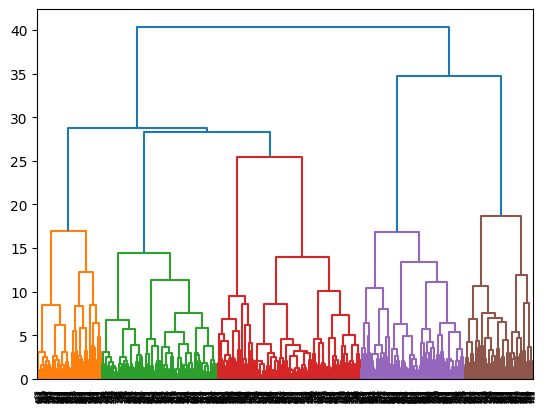

In [208]:
#dendogram yardımıyla kaç küme isteğimize(k) karar verebiliriz.
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(veri,method='ward'))
plt.show()

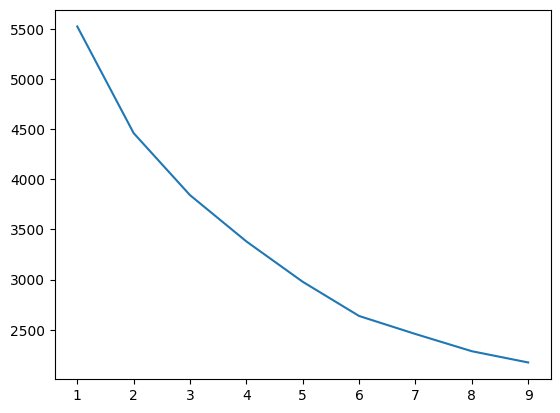

In [210]:
#WCSS değerlerine bakalım
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i, n_init=7, random_state=18)
    km.fit(veri)
    wcss.append(km.inertia_)#bu da wcss değerlerini ölçen fonksiyon
    
#artık elimizde wcss değerleri var ve biz uygun k sayısını bulabiliriz
plt.plot(range(1,10),wcss)
plt.show()
#kmeans ile wcss değerlerine baktık dendogram yarımıyla k değerini 6 olarak karar verdim.Çok fazla veri olduğu için 6 gibi büyük bir değer ile karşılaştım.
#k değerine karar verirken wcss tablosundaki dirsek noktası veya dendogramdaki kümeler arası en fazla mesafe olan kısmı k değeri olarak alabiliriz

In [212]:
from sklearn.cluster import AgglomerativeClustering

k=6

# id sütununu saklamak için bir liste oluşturun
id_listesi = df_id.values.tolist()



# Kümeleme
ac = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
pred = ac.fit_predict(veri)

# Sadece id'leri içeren bir liste oluşturun
tahmin_id_listesi = [id_listesi[i] for i in range(len(id_listesi))]

# Tahminleri alın ve id'leri ekleyin
tahminler = [(tahmin_id_listesi[i], pred[i]) for i in range(len(pred))]




In [215]:
# Küme etiketlerine göre verileri gruplara ayırın
kumeler = {}
for id, etiket in tahminler:
    if etiket in kumeler:
        kumeler[etiket].append(id)
    else:
        kumeler[etiket] = [id]





In [218]:
# Her bir küme için ekrana yazdırma
for i in kumeler:
    print('Playlist',i,'Şarkı Sayısı',len(kumeler[i]))

Playlist 2 Şarkı Sayısı 165
Playlist 4 Şarkı Sayısı 185
Playlist 3 Şarkı Sayısı 171
Playlist 0 Şarkı Sayısı 109
Playlist 1 Şarkı Sayısı 102
Playlist 5 Şarkı Sayısı 57


In [222]:
#şarkıları ekrana yazdıran kod parçası
#Buradan gelen çıktıyı kopyalayıp herhangi bir playliste yapıştırırsanız(ctrl+c, ctrl+v) şarkılar otomatik olarak playliste eklenecektir
n=5

for i in kumeler[n]:
    
    print('https://open.spotify.com/track/'+i)

https://open.spotify.com/track/2oa1uaz9P2dAQxlyOX8nsA
https://open.spotify.com/track/1meosvrJFk4xXo1HwUIasC
https://open.spotify.com/track/3NRql0A1Ef4RCvT473iqgD
https://open.spotify.com/track/0Ymjv0OJeIIPXr6s9wi3iW
https://open.spotify.com/track/7sliFe6W30tPBPh6dvZsIH
https://open.spotify.com/track/29TPjc8wxfz4XMn21O7VsZ
https://open.spotify.com/track/1h6w4POXM2LfG4ZD4xUfZQ
https://open.spotify.com/track/4TYLdoKFwfnFHrgsTH0bit
https://open.spotify.com/track/6lDJ0CkQ6LdQv5EUQ39rpg
https://open.spotify.com/track/6IEXjer2qbXhRLFv99NQQv
https://open.spotify.com/track/5Gt9bxniM1SxN61yRzRhXL
https://open.spotify.com/track/58zsLZPvfflaiIbNWoA22O
https://open.spotify.com/track/0VgkVdmE4gld66l8iyGjgx
https://open.spotify.com/track/6HCmuewveUWxu30HSCsWk5
https://open.spotify.com/track/50UvZQDUi0JFIrxfSkJSU8
https://open.spotify.com/track/59oJV5oBPXXQOJLbqzjlM7
https://open.spotify.com/track/1zBBo7indT2foQGQUoloWj
https://open.spotify.com/track/3Yyv4aOUIDSXyyZClHVKW2
https://open.spotify.com/tra